In [1]:
import math
import pandas as pd
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy
import random
import matplotlib.pyplot as plt

In [2]:
def Gale_Shapley(pr_man,pr_women,n):

    man_list = list(range(1,n+1))        
    women_list = list(range(n+1,n*2+1))  
    col=list(range(n+1,n*2+1))       
    ind=list(range(1,n+1))
    women_df = pd.DataFrame({col[i]:pr_women[i] for i in range(n)},index=ind) 
    man_df = pd.DataFrame(pr_man,columns=col,index=ind)                     
    women_available = {man:women_list for man in man_list}                    
    waiting = []           
    proposals = {}          
    count = 0

    while len(waiting)<len(man_list): 
        for man in man_list:
            if man not in waiting:   
                women = women_available[man]
                best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()                
                proposals[(man, best_choice)]=(man_df.loc[man][best_choice],women_df.loc[man][best_choice]) 
                overlays = Counter([key[1] for key in proposals.keys()]) 

        for women in overlays.keys():
            if overlays[women]>1:
                pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:] 
                
                for p_to_drop in pairs_to_drop: 
                    del proposals[p_to_drop[0]]
                    _women = copy(women_available[p_to_drop[0][0]])
                    _women.remove(p_to_drop[0][1])
                    women_available[p_to_drop[0][0]] = _women   

        waiting = [man[0] for man in proposals.keys()] 

        count+=1


    print(proposals)
    print("days=",count)

**1) Peor y mejor caso**


n=4

In [3]:
men=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[1,2,3,4]]
women=[[4,1,2,3],[3,4,1,2],[2,3,4,1],[1,2,3,4]]
Gale_Shapley(men,women,4)

{(2, 5): (3, 1), (3, 6): (3, 1), (4, 7): (3, 1), (1, 8): (4, 1)}
days= 10


In [4]:
men=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[4,2,3,1]]
women=[[1,2,3,4],[3,1,2,4],[2,3,1,4],[4,2,3,1]]
Gale_Shapley(men,women,4)

{(1, 5): (1, 1), (2, 6): (1, 1), (3, 7): (1, 1), (4, 8): (1, 1)}
days= 1


n=40

In [5]:
men=[]
base=list(range(1,41))
men.append(base)

for i in range(39):
    men.append(base[38-i:39]+base[:38-i]+base[39:])
base2=[40]
base2+=list(range(1,40))
women=[]
women.append(base2)

for i in range(39):
    women.append(base2[39-i:]+base2[:39-i])
Gale_Shapley(men,women,40)

{(2, 41): (39, 1), (3, 42): (39, 1), (4, 43): (39, 1), (5, 44): (39, 1), (6, 45): (39, 1), (7, 46): (39, 1), (8, 47): (39, 1), (9, 48): (39, 1), (10, 49): (39, 1), (11, 50): (39, 1), (12, 51): (39, 1), (13, 52): (39, 1), (14, 53): (39, 1), (15, 54): (39, 1), (16, 55): (39, 1), (17, 56): (39, 1), (18, 57): (39, 1), (19, 58): (39, 1), (20, 59): (39, 1), (21, 60): (39, 1), (22, 61): (39, 1), (23, 62): (39, 1), (24, 63): (39, 1), (25, 64): (39, 1), (26, 65): (39, 1), (27, 66): (39, 1), (28, 67): (39, 1), (29, 68): (39, 1), (30, 69): (39, 1), (31, 70): (39, 1), (32, 71): (39, 1), (33, 72): (39, 1), (34, 73): (39, 1), (35, 74): (39, 1), (36, 75): (39, 1), (37, 76): (39, 1), (38, 77): (39, 1), (39, 78): (39, 1), (40, 79): (39, 1), (1, 80): (40, 1)}
days= 1522


In [6]:
men=[]
base=list(range(1,41))
men.append(base)
for i in range(39):
    men.append(base[39-i:]+base[:39-i])

Gale_Shapley(men,men,40)

{(1, 41): (1, 1), (2, 42): (1, 1), (3, 43): (1, 1), (4, 44): (1, 1), (5, 45): (1, 1), (6, 46): (1, 1), (7, 47): (1, 1), (8, 48): (1, 1), (9, 49): (1, 1), (10, 50): (1, 1), (11, 51): (1, 1), (12, 52): (1, 1), (13, 53): (1, 1), (14, 54): (1, 1), (15, 55): (1, 1), (16, 56): (1, 1), (17, 57): (1, 1), (18, 58): (1, 1), (19, 59): (1, 1), (20, 60): (1, 1), (21, 61): (1, 1), (22, 62): (1, 1), (23, 63): (1, 1), (24, 64): (1, 1), (25, 65): (1, 1), (26, 66): (1, 1), (27, 67): (1, 1), (28, 68): (1, 1), (29, 69): (1, 1), (30, 70): (1, 1), (31, 71): (1, 1), (32, 72): (1, 1), (33, 73): (1, 1), (34, 74): (1, 1), (35, 75): (1, 1), (36, 76): (1, 1), (37, 77): (1, 1), (38, 78): (1, 1), (39, 79): (1, 1), (40, 80): (1, 1)}
days= 1


**2) Minimo, maximo y promedio**

In [12]:
def Gale_Shapley_modify(n):
    step_count=[]
    for t in range(100): 
        pr_man=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        pr_women=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        man_list = list(range(1,n+1))
        women_list = list(range(n+1,n*2+1))
        col=list(range(n+1,n*2+1))
        ind=list(range(1,n+1))
        women_df = pd.DataFrame({col[i]:pr_women[i] for i in range(n)},index=ind)    
        man_df = pd.DataFrame(pr_man,columns=col,index=ind) 
        women_available = {man:women_list for man in man_list}
        waiting_list = []
        proposals = {}
        count = 0
        while len(waiting_list)<len(man_list):
    
            for man in man_list:
        
                if man not in waiting_list:
                    
                    women = women_available[man]
                    best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()                    
                    proposals[(man, best_choice)]=(man_df.loc[man][best_choice],women_df.loc[man][best_choice])

            overlays = Counter([key[1] for key in proposals.keys()])           

            for women in overlays.keys():
                if overlays[women]>1:

                    pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() if women in pair}.items(), key=lambda x: x[1][1])[1:]

                    for p_to_drop in pairs_to_drop:
                        del proposals[p_to_drop[0]]
                        _women = copy(women_available[p_to_drop[0][0]])
                        _women.remove(p_to_drop[0][1])
                        women_available[p_to_drop[0][0]] = _women

            waiting_list = [man[0] for man in proposals.keys()]
            count+=1

        step_count.append(count)
    plt.hist(step_count, bins=max(step_count)-min(step_count))
    plt.xlabel('dias')
    plt.ylabel('Frecuencia')
    plt.title("Matchin perfecto")
    plt.show()
    print("# min de dias = ",min(step_count))
    print("# max de dias = ",max(step_count))
    print("promedio = ",sum(step_count)/len(step_count))

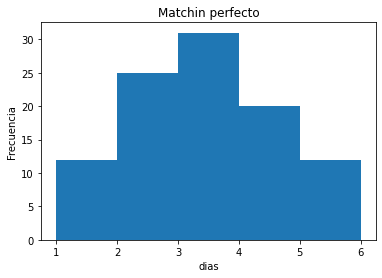

# min de dias =  1
# max de dias =  6
promedio =  2.98


In [13]:
Gale_Shapley_modify(4)

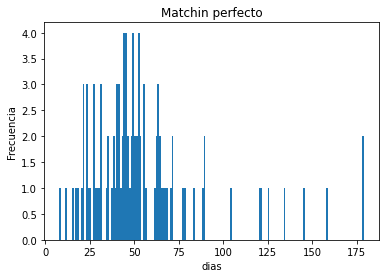

# min de dias =  8
# max de dias =  179
promedio =  54.3


In [14]:
Gale_Shapley_modify(40)